<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_2_pandas_classification_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # Data Manipulation
import numpy as np # Numerical / Math in Python
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Data Visualization

In [ ]:
df = pd.read_csv("/content/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape # Baris, Kolom

(569, 33)

# Steps in Data Science Process :
1. Data Acquisition

2. Exploratory Data Analysis(EDA) -> Menemukan informarsi dalam data

3. Data Preprocessing / Cleaning -> mengolah data untuk modeling

4. Modeling -> Membuat AI/Machine learning

5. Model Evaluation -> Evaluasi performa model yang sudah dibuat

6. Presentation result -> Presentasi hasil EDA, Modeling ke User

7. Deployment and Maintenance -> Model dipublish untuk digunakan

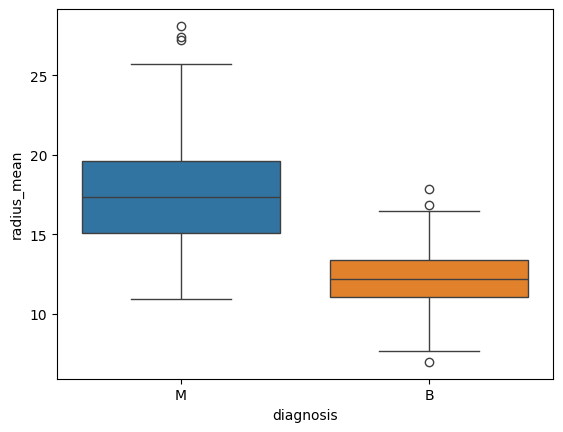

In [ ]:
# Library Seaborn

ax = sns.boxplot(x = df["diagnosis"],
                 y = df["radius_mean"],
                 hue = df["diagnosis"])

# Boxplot -> untuk memvisualkan data categorical dengan data numerical
# Outlier -> data yang tidak wajar

In [ ]:
# Library Plotly

fig = px.box(df,
             x = "diagnosis",
             y = "radius_mean",
             color = "diagnosis")

fig.show()

# Boxplot :
# - Data Minimum
# - Data Q1
# - Data Q2 / Median
# - Data Q3
# - Data Maksimum

In [ ]:
# Scatter Plot -> memvisualkan data numerical dengan numerical

fig = px.scatter(df,
                 x = "texture_mean",
                 y = "perimeter_mean",
                 color = "diagnosis")

fig.show()

# Korelasi -> hubungan antar variable

# Korelasi Positif -> apabila variable a naik/turun maka variable b mengikuti
# korelasi negatif -> apabila variable a naik/turun maka variable b akan berkebalikannya
# Tanpa/tidak ada Korelasi -> tidak ada hubungan antara variable a dan b

In [ ]:
fig = px.scatter(df,
                 x = "radius_mean",
                 y = "perimeter_mean",
                 color = "diagnosis")

fig.show()

In [ ]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
round(df["diagnosis"].value_counts() / len(df) * 100, 3) # Persentase dari value counts class diagnosis

diagnosis
B    62.742
M    37.258
Name: count, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x = "diagnosis",
                   color = "diagnosis")

fig.show()

# Kesimpulan EDA :
- untuk diagnosa M memiliki radius_mean lebih besar secara rata-rata dibandingkan dengan diagnosa B

- Dari data yang didapat terlihat bahwa jumlah kelas M lebih sedikit dibandingkan dengan kelas B, berpotensi IMBALANCE DATASET

- Secara texture_mean dan perimeter_mean, diagnosa M nilainya lebih besar dibandingkan dengan diagnosa B

- ...

In [ ]:
# Feature Engineering --> Memanipulasi feature yang bisa kita buang atau kita jadikan feature baru
df.head()

# ID -> Buang karena ID hanya urutan data pada database
# Unnamed : 32 -> karena semua data pada kolom kosong/hilang (NaN/Not a Number)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Feature and target data split
# Feature (semua data selain Diagnosis) / Bank Soal
X = df.drop(["id", "diagnosis", "Unnamed: 32"], axis = 1) # axis = 1 artinya buang secara kolom data

# Target (Diagnosis) / Kunci Jawaban dari Bank Soal
y = df["diagnosis"]

# 4. Modeling

In [ ]:
# Pemisahan data training dengan data testing

# Anggap Machine Learning adalah seorang siswa yang akan menghadapi ujian
# Sebelum ujian kita akan mempersiapkan soal untuk belajar dan ujian

# Train : 70% - 90% dari seluruh data -> X_train, y_train
# Test  : 30% - 10% dari seluruh data -> X_test, y_test

# X_train --> Soal belajar untuk siswa
# y_train --> kunci jawaban soal belajar siswa

# X_test --> Soal ujian untuk siswa
# y_test --> kunci jawaban soal ujian siswa (kita pakai untuk membandingkan jawaban prediksi dengan jawaban asli y_test)

In [ ]:
from sklearn.model_selection import train_test_split # memisahkan data train dan test pada feature dan target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42) # random_state membuat acakan yang sama

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression() # membuat object LogisticRegression
model_LR.fit(X_train, y_train) # Training model menggunakan data train

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_lr = model_LR.predict(X_test)
y_pred_lr

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier() # membuat object
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = model_DT.predict(X_test)
y_pred_DT

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [ ]:
# Support Vector Machine / SVM
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)

# Precision VS Recall Interview Test

Misalkan ada sebuah perusahaan, Team HR ingin meminta seorang Data Scientist untuk membuat AI untuk prediksi kira2 karyawan mana yang akan mengundurkan diri. Kira2 Data Scientist tersebut harus lebih melihat hasil Precision atau Recall agar persentase karyawan yang mengundurkan diri bisa didetect secara akurat?

Diuji secara business dan teori data science


- PRECISION
sebelum itu jelaskan arti precision kemudian jelaskan skenario
Jika perusahaan memiliki budget lebih untuk menahan karyawan dengan menambahkan benefits



- RECALL
sebelum itu jelaskan arti recall kemudian jelaskan skenario
Jika perusahaan memiliki budget yang terbatas maka harus diutamakan karyawan yang bener2 akan berpotensi resign saja

In [ ]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

# Logistic Regression
cm_lr = confusion_matrix(y_pred_lr, y_test)
print(cm_lr)

[[70  3]
 [ 1 40]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        73
           M       0.93      0.98      0.95        41

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [ ]:
print(classification_report(y_pred_DT, y_test))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(classification_report(y_pred_RF, y_test))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        72
           M       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           B       1.00      0.92      0.96        77
           M       0.86      1.00      0.92        37

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



# Deployment
Use Logistic Regression and Random Forest for Deploy